#Présentation

In [74]:
# Load the dataset
from data import load_data_viz_data
import pandas as pd
import matplotlib.pyplot as plt

data = load_data_viz_data()
data[['LAT','LONG']] = data[['LAT','LONG']].astype('float64')

print("Shape of the DataFrame:", data.shape)

data.head(10)

Shape of the DataFrame: (237221, 9)


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
5,I172075854,Fraud and law violations,0,2015-09-02 09:00:00,42.314013,-71.086353,Roxbury,42.328894,-71.085359
6,I172065681,Fraud and law violations,0,2015-07-25 02:00:00,42.316339,-71.068800,Roxbury,42.328894,-71.085359
7,I172060902,Fraud and law violations,0,2015-11-12 12:00:00,42.316057,-71.078200,Roxbury,42.328894,-71.085359
8,I172026505,Fraud and law violations,0,2015-08-01 12:00:00,42.330013,-71.091179,Roxbury,42.328894,-71.085359
9,I172014289,Other,0,2015-12-01 12:00:00,42.323410,-71.093396,Roxbury,42.328894,-71.085359


In [75]:
df_most_common = pd.DataFrame([],columns = ['DISTRICT','MOST_COMMON_INCIDENT'])
i=0
for dis in data['NAME'].unique():
    df = data[data['NAME'] == dis]
    rank = 0 #most common
    off = df[['NAME','OFFENSE_CODE_GROUP']].value_counts().index[rank][1]
    df_most_common.loc[i] = [dis,off]
    i=i+1
#df_most_common

In [76]:
df_second_common = pd.DataFrame([],columns = ['DISTRICT','SECOND_COMMON_INCIDENT'])
i=0
for dis in data['NAME'].unique():
    df = data[data['NAME'] == dis]
    rank = 1 #most common
    off = df[['NAME','OFFENSE_CODE_GROUP']].value_counts().index[rank][1]
    df_second_common.loc[i] = [dis,off]
    i=i+1
#df_second_common

In [77]:
df2 = data.groupby(by='NAME').sum()[['SHOOTING']]
df2

,SHOOTING
NAME,
Brighton,24
Charlestown,5
Dorchester,239
Downtown,19
East Boston,23
Hyde Park,40
Jamaica Plain,86
Mattapan,297
Roxbury,487


In [78]:
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE']).dt.year


In [79]:
data['OCCURRED_ON_DATE']#.dt.year

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
237216    2018
237217    2018
237218    2018
237219    2018
237220    2018
Name: OCCURRED_ON_DATE, Length: 237221, dtype: int64

In [83]:
data['OCCURRED_ON_DATE']

0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
237216    2018
237217    2018
237218    2018
237219    2018
237220    2018
Name: OCCURRED_ON_DATE, Length: 237221, dtype: int64

In [85]:
df2 = data.groupby(by='OCCURRED_ON_DATE',as_index=False).sum()[['SHOOTING','OCCURRED_ON_DATE']]

In [86]:
df2

,SHOOTING,OCCURRED_ON_DATE
0,227,2015
1,326,2016
2,425,2017
3,377,2018


Text(0.5, 1.0, 'Nombre de fusillades en focntion du temps')

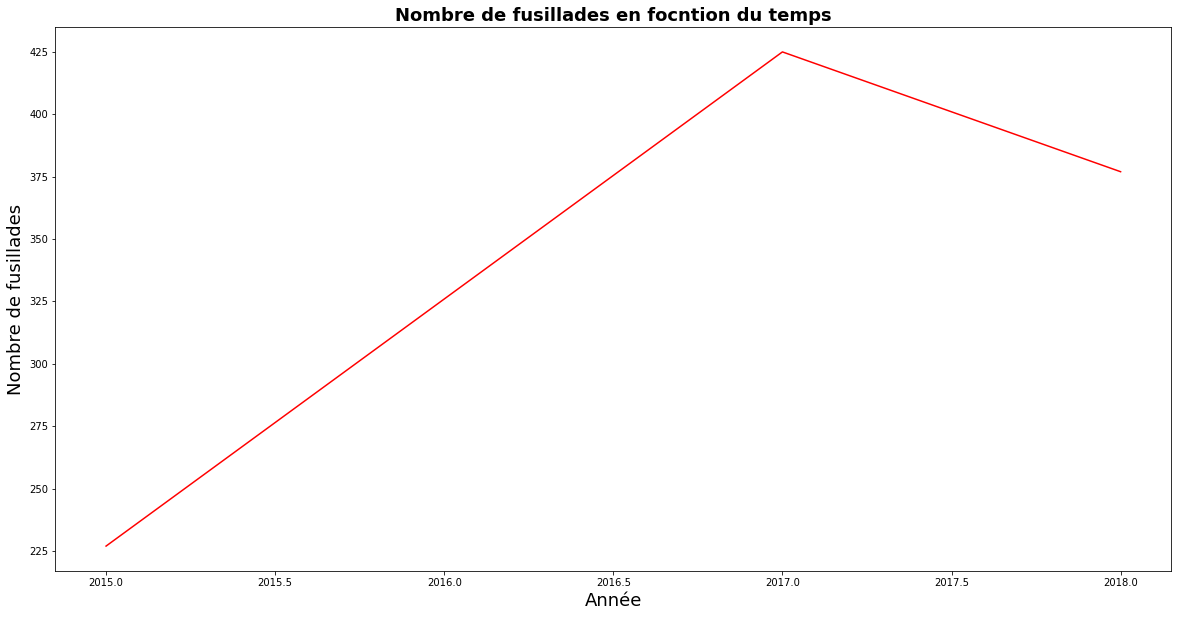

In [95]:
plt.figure(figsize=(20,10))

font = {'size' : 18}
font_maintitle = {'weight' : 'bold', 'size' : 22}
font_title = {'weight' : 'bold', 'size' : 18}
plt.plot(df2['OCCURRED_ON_DATE'], df2['SHOOTING'], label=f"line courbe {i}",c='r',markersize=10)
plt.ylabel('Nombre de fusillades',**font)
plt.xlabel('Année',**font)
plt.title(f"Nombre de fusillades en focntion du temps",**font_title)

In [96]:
df2 = data.groupby(by='OCCURRED_ON_DATE',as_index=False).count()[['OFFENSE_CODE_GROUP','OCCURRED_ON_DATE']]

In [97]:
df2

,OFFENSE_CODE_GROUP,OCCURRED_ON_DATE
0,38507,2015
1,67270,2016
2,66894,2017
3,64550,2018


Text(0.5, 1.0, "Nombre d'incidents en focntion du temps")

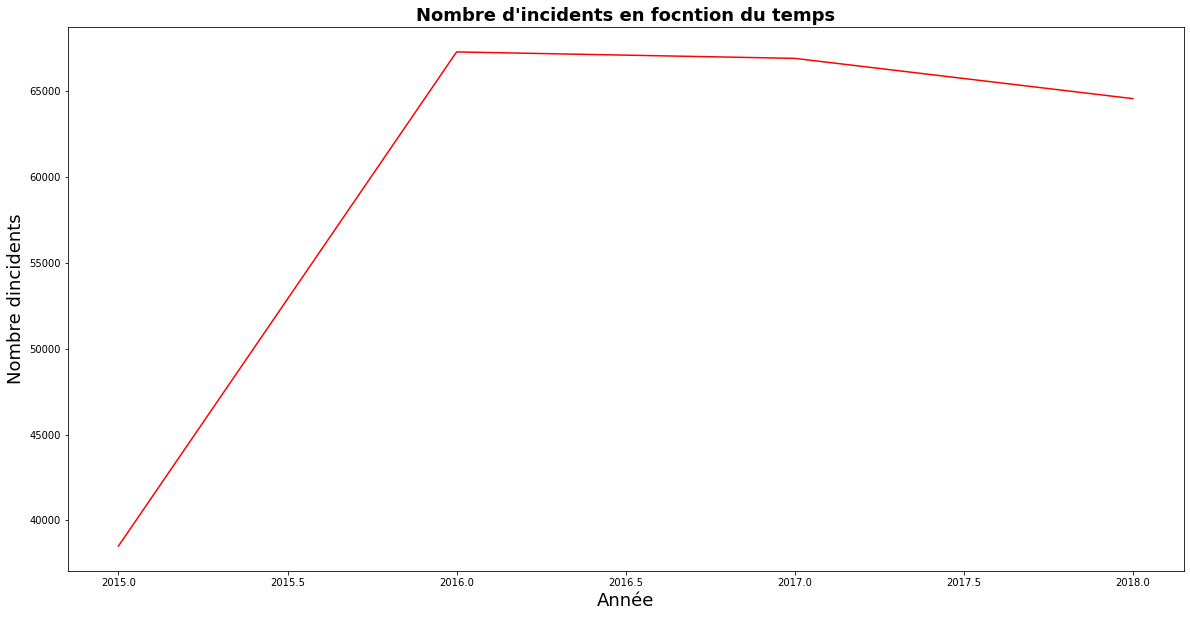

In [100]:
plt.figure(figsize=(20,10))

font = {'size' : 18}
font_maintitle = {'weight' : 'bold', 'size' : 22}
font_title = {'weight' : 'bold', 'size' : 18}
plt.plot(df2['OCCURRED_ON_DATE'], df2['OFFENSE_CODE_GROUP'], label=f"line courbe {i}",c='r',markersize=10)
plt.ylabel('Nombre dincidents',**font)
plt.xlabel('Année',**font)
plt.title(f"Nombre d'incidents en focntion du temps",**font_title)